In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

In [2]:
def mode_ties(s):
    m = s.mode()
    if len(m) > 1:
        random.shuffle(m)
        return(m[0])
    return m

def get_mv(task):
    df_answer = pd.read_csv('data/same-index-separate/answer_' + task + '.csv')
    df_answer = df_answer[['question', 'answer']].groupby('question').agg(mode_ties)

    df_truth = pd.read_csv('data/same-index-separate/truth_' + task + '.csv')
    df_truth = df_truth.set_index('question')

    df_full = df_answer.join(df_truth, on='question', how='inner')
    acc = accuracy_score(df_full['answer'], df_full['truth'])
    return(acc)

In [3]:
def get_ds(task):
    df_ds = pd.read_csv('DawidSkene/results/results-supervision/DS/results_supervised_' + task + '.csv')[['level', 'accuracy']]
    df_ds.columns = ['supervision_level', 'ds']
    df_ds = df_ds.groupby('supervision_level').mean()
    return df_ds

def get_mace(task):
    df_mace = pd.read_csv('MACE/results/scores/results_supervised_' + task + '.csv')[['level', 'accuracy']]
    df_mace.columns = ['supervision_level', 'mace']
    df_mace = df_mace.groupby('supervision_level').mean()
    return df_mace

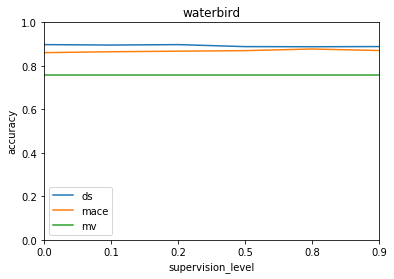

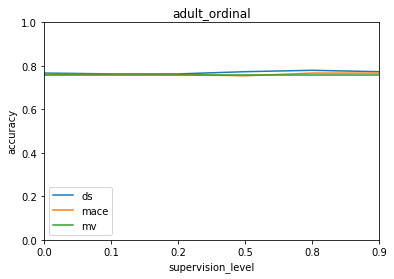

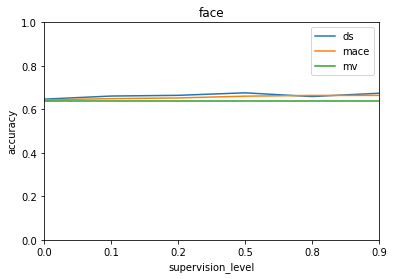

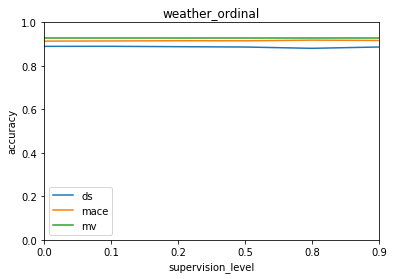

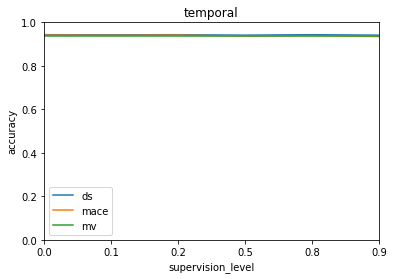

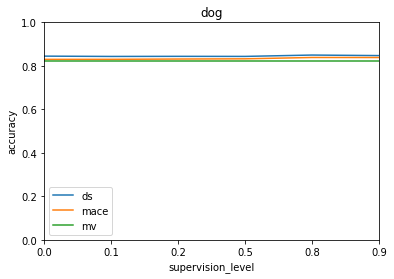

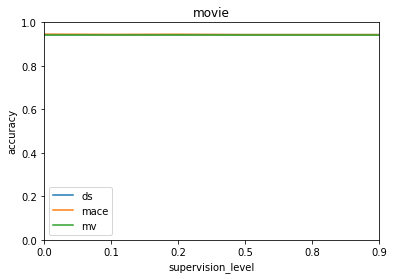

In [8]:
tasks = ['waterbird', 'adult_ordinal', 'face', 'weather_ordinal', 'temporal', 'dog', 'movie']

for task in tasks:
    df_ds = get_ds(task)
    df_mace = get_mace(task)

    df = df_ds.join(df_mace, how='inner')
    df['mv'] = get_mv(task)

    df.index = df_ds.index.astype(str)
    ax = df.plot.line(title=task)
    ax.set_ylabel('accuracy')
    ax.set_ylim(0,1)